In [120]:
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
df = pd.read_excel('./data/data_AI_and_Human_generated_texts.xlsx', sheet_name='AI_and_Human_generated_texts')
true_responses = ['No', 'Yes', 'Yes', 'No', 'Yes', 'No']
considered_variables = ['Age', 'Study Field', 'Study Level']

In [103]:
def get_classification_rate(group):
    number_of_correct_classification = 0
    for index, row in group.iterrows():
        for i in range(6):
            if row['Is the following text AI generated? ({})'.format(i+1)] == true_responses[i]:
                number_of_correct_classification+=1
    return number_of_correct_classification / (group.shape[0]*6)
        

In [136]:
## Classification rates based on the age, study field and study level
stats = {'Age': [],
         'Study Field': [],
         'Study Level': []}

for considered_criteria in considered_variables:
    print('**********************************************************')
    print('Rates based on : {}'.format(considered_criteria))
    for value in df[considered_criteria].unique():
        group = df[df[considered_criteria] == value]
        stats[considered_criteria].append((value, get_classification_rate(group)))
        print(value, get_classification_rate(group))
    print('**********************************************************\n')

print('**********************************************************\n')
print('Rates for each considered Variable')
for considered_criteria in considered_variables:
    print('**********************************************************')
    print(considered_criteria)
    print(stats[considered_criteria])
    print('**********************************************************\n')


print('**********************************************************\n')
print('**********************************************************\n')
print('classification rate everithing included: {}'.format(get_classification_rate(df)))

**********************************************************
Rates based on : Age
26 - 30 0.5333333333333333
21 - 25 0.5892857142857143
31 - 35 0.6666666666666666
36 - 40 0.5
16 - 20 0.5555555555555556
76 - 80 0.5
**********************************************************

**********************************************************
Rates based on : Study Field
Language and Literature Science 0.3888888888888889
IT(Business Informatics, System Engineering, Media Informatics, Computer Science) 0.5814814814814815
**********************************************************

**********************************************************
Rates based on : Study Level
Master 0.5
Bachelor 0.6190476190476191
Professor 0.5
**********************************************************

**********************************************************

Rates for each considered Variable
**********************************************************
Age
[('26 - 30', 0.5333333333333333), ('21 - 25', 0.5892857142857143), ('

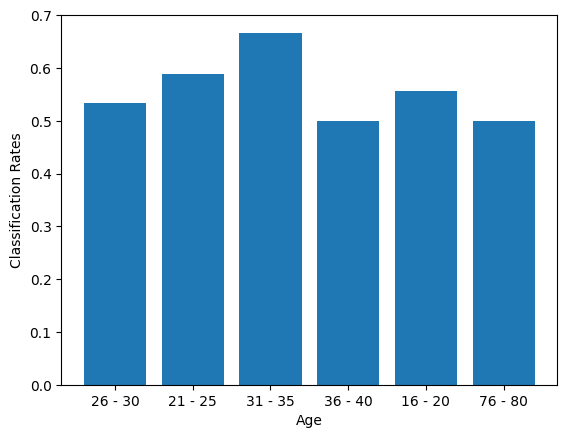

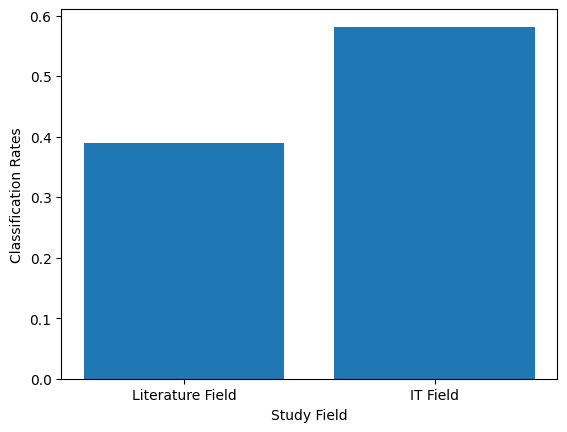

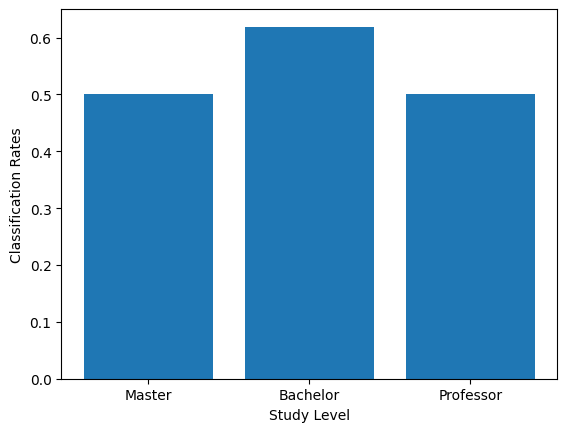

In [135]:
for considered_criteria in considered_variables:
    xlabl = []
    x = [a[0] for a in stats[considered_criteria]]
    y = [a[1] for a in stats[considered_criteria]]
    if considered_criteria == 'Study Field':
        x = ['Literature Field', 'IT Field']
    plt.bar(x,y)
    plt.xlabel(considered_criteria)
    plt.ylabel('Classification Rates')
    plt.show()